In [88]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [89]:
load_dotenv()

True

In [90]:
my_btc=1.2

In [91]:
my_eth=5.3

In [92]:
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [93]:
btc_url_json = btc_url + "?format=json"

In [94]:
eth_url_json = eth_url + "?format=json"

In [95]:
btc_data = requests.get(btc_url_json).json()

In [96]:
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18520256,
            "total_supply": 18520256,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11380.13,
                    "volume_24h": 15570312714,
                    "market_cap": 210829466034,
                    "percentage_change_1h": 0.110187841349206,
                    "percentage_change_24h": 0.549979671027945,
                    "percentage_change_7d": 0.829222267676003,
                    "percent_change_1h": 0.110187841349206,
                    "percent_change_24h": 0.549979671027945,
                    "percent_change_7d": 0.829222267676003
                }
            },
            "last_updated": 1602983924
        }
    },
    "metadata": {
        "timestamp": 1602983924,
        "num_cr

In [97]:
btc_price=btc_data['data']['1']['quotes']['USD']['price']

In [98]:
btc_price

11380.13

In [99]:
eth_data = requests.get(eth_url_json).json()

In [100]:
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113050116,
            "total_supply": 113050116,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 369.17,
                    "volume_24h": 7313541288,
                    "market_cap": 41759208757,
                    "percentage_change_1h": 0.247370192586691,
                    "percentage_change_24h": 1.05552899370143,
                    "percentage_change_7d": -0.351830799167485,
                    "percent_change_1h": 0.247370192586691,
                    "percent_change_24h": 1.05552899370143,
                    "percent_change_7d": -0.351830799167485
                }
            },
            "last_updated": 1602983972
        }
    },
    "metadata": {
        "timestamp": 1602983972,
        "num_cry

In [101]:
eth_price=eth_data['data']['1027']['quotes']['USD']['price']

In [102]:
eth_price

369.17

In [103]:
btc_value = my_btc * btc_price

In [104]:
eth_value = my_eth * eth_price

In [105]:
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $13656.16
The current value of your 5.3 ETH is $1956.60


In [106]:
my_agg=200

In [107]:
my_spy=50

In [108]:
alpaca = tradeapi.REST(
    'AKZ0OWYIJ8BKB4W7JWQ1',
    'uZGF1tiwPITsQxq1kwLu4M5lqhTqxoPpyGyTwUf4',
    api_version = "v2"
)

In [109]:
tickers = ["AGG", "SPY"]


In [110]:
timeframe = "1D"

In [111]:
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat() 

In [112]:

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [113]:
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [114]:
df_closing_prices = pd.DataFrame()

In [115]:
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]

In [116]:
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

In [117]:
df_closing_prices

,AGG,SPY
2020-10-16 00:00:00-04:00,117.88,347.25


In [118]:

df_closing_prices.index = df_closing_prices.index.date

In [119]:
df_closing_prices

,AGG,SPY
2020-10-16,117.88,347.25


In [120]:
agg_price = df_closing_prices['AGG'].values[0]

In [121]:
spy_price = df_closing_prices['SPY'].values[0]

In [122]:
agg_value = my_agg * agg_price

In [123]:
spy_value = my_spy * spy_price

In [124]:
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [125]:
print(f"The current value of your {my_agg} AGG is ${agg_value:0.2F}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 200 AGG is $23576.00
The current value of your 5.3 ETH is $1956.60


In [126]:
monthly_income=12000

In [127]:
saving_amounts = {'Amount':[btc_value + eth_value, agg_value + spy_value]}

In [128]:
df_savings = pd.DataFrame(saving_amounts, index = ['Crypto','Shares'])

In [129]:
display(df_savings)

,Amount
Crypto,15612.757
Shares,40938.500


In [130]:
from matplotlib import pyplot as plt 


<ipython-input-131-0f578ce08d5d>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df_savings, labels =['Crypto', 'Shares'])


([<matplotlib.patches.Wedge at 0x183208d7730>,
 [Text(0.7115467907825913, 0.8388689793567261, 'Crypto'),
  Text(-0.7115467907825914, -0.8388689793567261, 'Shares')])

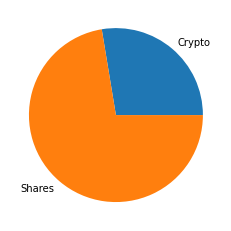

In [131]:
plt.pie(df_savings, labels =['Crypto', 'Shares'])


In [132]:
emergency_fund = monthly_income * 3

In [133]:
emergency_fund

36000

In [134]:
savings_amount = df_savings['Amount'].sum()

In [135]:
savings_amount

56551.257

In [136]:
savings_need = emergency_fund - savings_amount

In [137]:
if savings_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif savings_amount == emergency_fund:
    print("Congratulations! You are reaching in your emergency fund")
else:
    print(f"You need {savings_need} to reach goal")


Congratulations! You have enough money in your emergency fund


In [138]:
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

In [139]:
portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [140]:
portfolio.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-01-02 00:00:00-05:00  110.18  110.50  110.18  110.45  1766432.0  206.38   
2015-01-05 00:00:00-05:00  110.56  110.76  110.48  110.67  3220575.0  204.17   
2015-01-06 00:00:00-05:00  110.96  111.35  110.89  110.97  3089810.0  202.09   
2015-01-07 00:00:00-05:00  111.00  111.04  110.74  110.92  3616860.0  201.42   
2015-01-08 00:00:00-05:00  110.84  110.84  110.63  110.74  1873126.0  204.00   

                                                               
                             high      low   close     volume  
2015-01-02 00:00:00-05:00  206.88  204.180  205.41   94506045  
2015-01-05 00:00:00-05:00  204.37  201.350  201.80  133100354  
2015-01-06 00:00:00-05:00  202.72  198.855  199.82  166955423  
2015-01-07 00:00:00-05:00  202.72  200.880  202.34  103285826  
2015-01-08 00:00:00-05:00  206.16  203.990  205.92  112316394

In [141]:
MC_even_dist = MCSimulation(
    portfolio_data = portfolio,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_even_dist.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-01-02 00:00:00-05:00  110.18  110.50  110.18  110.45  1766432.0   
2015-01-05 00:00:00-05:00  110.56  110.76  110.48  110.67  3220575.0   
2015-01-06 00:00:00-05:00  110.96  111.35  110.89  110.97  3089810.0   
2015-01-07 00:00:00-05:00  111.00  111.04  110.74  110.92  3616860.0   
2015-01-08 00:00:00-05:00  110.84  110.84  110.63  110.74  1873126.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
2015-01-02 00:00:00-05:00          NaN  206.38  206.88  204.180  205.41   
2015-01-05 00:00:00-05:00     0.001992  204.17  204.37  201.350  201.80   
2015-01-06 00:00:00-05:00     0.002711  202.09  202.72  198.855  199.82   
2015-01-07 00:00:00-05:00    -0.000451  201.42  202.72  200.880  202.34   
2015-01-08 00:00:00-05:00    -0.001623  204.00  206.16  203.990  205.92   

                                                   
                              volume daily_return  
2015-01-02 00:00:00-05:00   94506045          NaN  
2015-01-05 00:00:00-05:00  133100354    -0.017575  
2015-01-06 00:00:00-05:00  166955423    -0.009812  
2015-01-07 00:00:00-05:00  103285826     0.012611  
2015-01-08 00:00:00-05:00  112316394     0.017693

In [142]:
MC_even_dist.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003012,0.985008,1.004270,0.994520,0.994888,0.999679,1.002038,1.004026,1.007611,1.002767,...,1.008029,0.997032,0.993738,0.992251,0.993876,0.997288,0.994398,1.005875,1.000805,1.007024
2,1.010028,0.987325,1.003599,0.991821,0.989941,1.007486,0.997979,1.000021,1.005860,0.998193,...,1.008614,0.988595,1.018514,1.008424,0.999413,1.011035,0.985545,0.995705,1.002341,1.002980
3,1.006702,0.997175,1.002005,0.989670,0.997836,1.002175,1.007922,0.998608,1.011714,0.994504,...,0.996547,0.997201,1.011755,1.012509,1.003729,1.006148,0.976418,0.994299,1.008499,1.001923
4,1.015596,0.998655,1.013859,0.991333,0.997558,1.004124,1.003193,0.995169,1.016957,1.000920,...,0.986387,1.004399,1.015887,1.004841,0.997794,1.000487,0.968122,0.995380,1.006099,1.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.116707,1.959893,14.592057,3.536828,5.491102,5.619429,3.512642,5.698946,5.219796,7.806104,...,8.891243,4.419034,9.376069,1.730286,7.725410,8.301788,8.544670,11.169327,2.720083,6.225621
7557,6.146916,1.974359,14.640888,3.513407,5.469661,5.694669,3.532734,5.720591,5.257354,7.785469,...,8.816832,4.399503,9.279565,1.734817,7.681808,8.339220,8.596615,11.239684,2.708366,6.258863
7558,6.072913,1.975426,14.485688,3.528916,5.530272,5.636719,3.532670,5.664677,5.237209,7.766590,...,8.918342,4.421370,9.300200,1.737507,7.702934,8.434020,8.613324,11.345715,2.724109,6.196552
7559,6.025324,1.973670,14.454894,3.548054,5.612254,5.655960,3.552203,5.673768,5.244173,7.698364,...,9.004948,4.409601,9.411632,1.736501,7.670362,8.408240,8.593524,11.511348,2.747139,6.226522


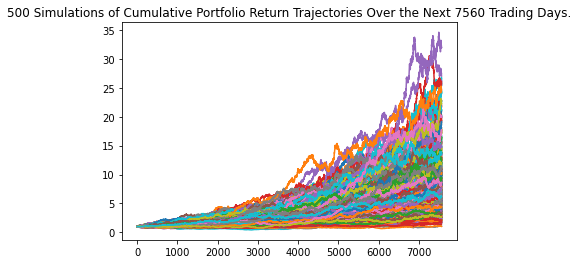

In [143]:
line_plot = MC_even_dist.plot_simulation()

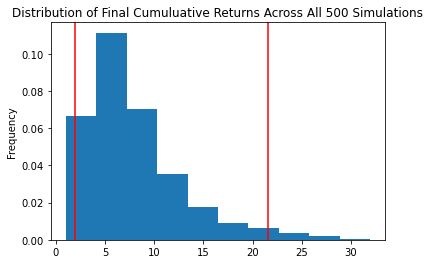

In [144]:
dist_plot = MC_even_dist.plot_distribution()

In [145]:
even_tbl = MC_even_dist.summarize_cumulative_return()

In [146]:
print(even_tbl)

count           500.000000
mean              7.927327
std               4.963326
min               1.028017
25%               4.409743
50%               6.687093
75%               9.885626
max              31.935819
95% CI Lower      1.979900
95% CI Upper     21.570245
Name: 7560, dtype: float64


In [147]:
initial_investment = 20000

In [148]:
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

In [149]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39598.0 and $431404.9


In [150]:
initial_investment2 = 20000 *1.5

In [151]:
ci2_lower = round(even_tbl[8]*initial_investment2,2)
ci2_upper = round(even_tbl[9]*initial_investment2,2)

In [152]:
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci2_lower} and ${ci2_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59397.0 and $647107.35
